In [1]:
import datetime
print(datetime.datetime.now())

2020-10-26 13:32:53.044118


In [2]:
import os
os.getcwd()

'C:\\Users\\ari62\\Documents\\Python Scripts\\Text_Analytics\\Big_Data_Cup'

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [4]:
# Loading packages

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter 
# For performing mathematical operations
import math
# For replacing
import re
# For handling strings
import string

In [5]:
# Loading the training data
train_df = pd.read_csv("spamraw_train.csv")
train_df.info()
train_df.shape
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   sms_text  5000 non-null   object
 2   spam      5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


(5000, 3)

,id,sms_text,spam
0,1,Hope you are having a good week. Just checking in,0
1,2,K..give back my thanks.,0
2,3,Am also doing in cbe only. But have to pay.,0
3,4,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",1
4,5,okmail: Dear Dave this is your final notice to...,1


In [6]:
# Checking for missing data
train_df.isna().sum()

id          0
sms_text    0
spam        0
dtype: int64

No missing data

In [7]:
# Checking for data imbalance
train_df["spam"].value_counts()

0    4327
1     673
Name: spam, dtype: int64

Data is imbalanced

In [8]:
# Text data Feature Engineering

#Word Count of each review
train_df['word_count'] = train_df['sms_text'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
train_df['char_count'] = train_df['sms_text'].str.len() ## this also includes spaces

In [9]:
#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['sms_text']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
train_df['reviewChars'] = count_characters(train_df)

In [10]:
#Number of Punctuations

def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['sms_text']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
train_df['reviewPuncts'] = numpunct(train_df)

In [11]:
# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
train_df['ratiopunChar'] = ratio_puncts_chars(train_df)

In [12]:
#Number of Capital Words
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['sms_text']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
train_df['reviewCwords'] = numcapwords(train_df)

In [13]:
#Sentiment Analysis 
from textblob import TextBlob
train_df['polarity_score']=train_df['sms_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [14]:
#Frequency distribution of Part of Speech Tags
import textblob
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt
train_df['noun_count'] = train_df['sms_text'].apply(lambda x: check_pos_tag(x, 'noun'))
train_df['verb_count'] = train_df['sms_text'].apply(lambda x: check_pos_tag(x, 'verb'))
train_df['adj_count'] = train_df['sms_text'].apply(lambda x: check_pos_tag(x, 'adj'))
train_df['adv_count'] = train_df['sms_text'].apply(lambda x: check_pos_tag(x, 'adv'))
train_df['pron_count'] = train_df['sms_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [15]:
train_df.head()

,id,sms_text,spam,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count
0,1,Hope you are having a good week. Just checking in,0,10,49,48,1,0.020833,0,0.700,3,2,1,1,1
1,2,K..give back my thanks.,0,4,23,20,3,0.150000,0,0.100,2,0,0,0,1
2,3,Am also doing in cbe only. But have to pay.,0,10,43,41,2,0.048780,0,0.000,2,3,0,2,0
3,4,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",1,21,149,145,4,0.027586,3,0.375,10,2,1,1,1
4,5,okmail: Dear Dave this is your final notice to...,1,27,161,156,5,0.032051,3,0.000,12,3,2,0,2


In [16]:
#Text Preprocessing

# Remove ,,, from entries in name column
train_df['Sms_text_pre'] = train_df['sms_text'].str.replace(r'\,,,','')
#train_df['Sms_text_pre'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_df['Sms_text_pre']=train_df['Sms_text_pre'].apply(lambda x:expand_contractions(x))

#Lowercase letters
train_df['Sms_text_pre']=train_df['Sms_text_pre'].str.lower()

#Remove digits and words containing digits 
train_df['Sms_text_pre']=train_df['Sms_text_pre'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
train_df['Sms_text_pre']=train_df['Sms_text_pre'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(train_df['Sms_text_pre']).split()).value_counts()[:10]
print("Most common words in the train dataset")
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
train_df['Sms_text_pre'] = train_df['Sms_text_pre'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#train_df['Sms_text_pre'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(train_df['Sms_text_pre']).split()).value_counts()[-100:]
#freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
train_df['Sms_text_pre'] = train_df['Sms_text_pre'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train_df['Sms_text_pre'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_df['Sms_text_pre_stop'] = train_df['Sms_text_pre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
train_df['Sms_text_pre_clean'] = train_df['Sms_text_pre_stop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train_df[["sms_text","Sms_text_pre_clean"]].head()


Most common words in the train dataset


i      2432
to     2041
you    1947
a      1297
is     1229
u      1209
the    1208
and     875
in      818
me      727
dtype: int64

0     hope you are having a good week just checking in
1                                 kgive back my thanks
2            am also doing in cbe only but have to pay
3    complimentary star ibiza holiday or £ cash nee...
4    okmail dear dave this is your final notice to ...
Name: Sms_text_pre, dtype: object

,sms_text,Sms_text_pre_clean
0,Hope you are having a good week. Just checking in,hope good week checking
1,K..give back my thanks.,kgive back thanks
2,Am also doing in cbe only. But have to pay.,also cbe pay
3,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary star ibiza holiday £ cash need u...
4,okmail: Dear Dave this is your final notice to...,okmail dear dave final notice collect tenerife...


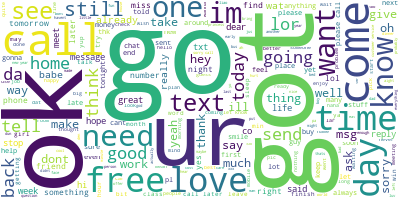

In [17]:
#Generate Word Cloud for train data
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(train_df['Sms_text_pre_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [18]:
#Text to Vector. Creating bag of words.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.01,max_df = 0.05,max_features=1000, lowercase=True, stop_words = 'english', ngram_range=(1, 2))
#fit the vectorizers to the data.

features = vectorizer.fit_transform(train_df['Sms_text_pre_clean'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [19]:
vectorizer.get_feature_names()

['ask',
 'babe',
 'buy',
 'care',
 'cash',
 'claim',
 'come',
 'contact',
 'customer',
 'da',
 'day',
 'dear',
 'dont',
 'feel',
 'free',
 'friend',
 'going',
 'gonna',
 'good',
 'got',
 'great',
 'gud',
 'guy',
 'happy',
 'help',
 'hey',
 'hi',
 'home',
 'hope',
 'ill',
 'im',
 'know',
 'later',
 'let',
 'life',
 'like',
 'lol',
 'lor',
 'love',
 'make',
 'meet',
 'message',
 'min',
 'miss',
 'mobile',
 'morning',
 'msg',
 'need',
 'new',
 'night',
 'number',
 'oh',
 'ok',
 'phone',
 'pick',
 'place',
 'pls',
 'prize',
 'really',
 'reply',
 'right',
 'said',
 'say',
 'send',
 'sent',
 'service',
 'soon',
 'sorry',
 'stop',
 'sure',
 'tc',
 'tell',
 'text',
 'thanks',
 'thing',
 'think',
 'time',
 'today',
 'tomorrow',
 'tonight',
 'txt',
 'urgent',
 'wait',
 'wan',
 'want',
 'wat',
 'way',
 'week',
 'win',
 'word',
 'work',
 'yeah',
 'year',
 'yes']

In [20]:
train_df.columns

Index(['id', 'sms_text', 'spam', 'word_count', 'char_count', 'reviewChars',
       'reviewPuncts', 'ratiopunChar', 'reviewCwords', 'polarity_score',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'Sms_text_pre', 'Sms_text_pre_stop', 'Sms_text_pre_clean'],
      dtype='object')

In [21]:
#Select features to use in model
train_df1=train_df[['word_count', 'char_count','polarity_score','spam','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
train_df2= pd.concat([pandaframe.reset_index(drop=True), train_df1.reset_index(drop=True)], axis=1)

In [22]:
#Repace infiniti values with zero, if any to avoid errors when building the model
train_df2.info()
train_df2 = train_df2.replace([np.inf, -np.inf], np.nan)
train_df2["ratiopunChar"]=train_df2["ratiopunChar"].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 107 entries, ask to pron_count
dtypes: float64(96), int64(11)
memory usage: 4.1 MB


In [23]:
train_df2.shape
train_df2.head()

(5000, 107)

,ask,babe,buy,care,cash,claim,come,contact,customer,da,...,spam,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,noun_count,verb_count,adj_count,adv_count,pron_count
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,48,1,0.020833,0,3,2,1,1,1
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,20,3,0.150000,0,2,0,0,0,1
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,41,2,0.048780,0,2,3,0,2,0
3,0.0,0.0,0.0,0.0,0.605684,0.0,0.0,0.0,0.0,0.0,...,1,145,4,0.027586,3,10,2,1,1,1
4,0.0,0.0,0.0,0.0,0.579025,0.0,0.0,0.0,0.0,0.0,...,1,156,5,0.032051,3,12,3,2,0,2


# Loading, Feature Engineering and Preprocessing the test dataset

Feature Engineering and pre-processing should be same for both train and test datasets

In [24]:
test_df = pd.read_csv("spamraw_test.csv")
test_df.head()
test_df.info()
test_df.shape

,id,sms_text
0,12000,HOT LIVE FANTASIES call now 08707509020 Just 2...
1,12001,I not at home now lei...
2,12002,So how's scotland. Hope you are not over showi...
3,12003,Yo you around? A friend of mine's lookin to pi...
4,12004,I'm aight. Wat's happening on your side.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        559 non-null    int64 
 1   sms_text  559 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


(559, 2)

In [25]:
# Checking for missing data
test_df.isna().sum()

id          0
sms_text    0
dtype: int64

In [26]:
#Feature Engineering

#Word Count of each review
test_df['word_count'] = test_df['sms_text'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
test_df['char_count'] = test_df['sms_text'].str.len() ## this also includes spaces

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_test_df):
    reviewcharacters = []
    text_col = data_test_df['sms_text']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_test_df['reviewChars'] = reviewcharacters
    return data_test_df['reviewChars']
test_df['reviewChars'] = count_characters(test_df)

#Number of Punctuations

def numpunct(data_test_df):
    reviewPuncts = []
    for i in data_test_df['sms_text']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_test_df['reviewPuncts'] = reviewPuncts
    return data_test_df['reviewPuncts']
test_df['reviewPuncts'] = numpunct(test_df)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_test_df):
    return data_test_df['reviewPuncts'] / data_test_df['reviewChars']
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)

#Number of Capital Words
def numcapwords(data_test_df):
    reviewCwords = []
    for i in data_test_df['sms_text']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_test_df['reviewCwords'] = reviewCwords
    return data_test_df['reviewCwords']
test_df['reviewCwords'] = numcapwords(test_df)


#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity_score']=test_df['sms_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Frequency distribution of Part of Speech Tags
test_df['noun_count'] = test_df['sms_text'].apply(lambda x: check_pos_tag(x, 'noun'))
test_df['verb_count'] = test_df['sms_text'].apply(lambda x: check_pos_tag(x, 'verb'))
test_df['adj_count'] = test_df['sms_text'].apply(lambda x: check_pos_tag(x, 'adj'))
test_df['adv_count'] = test_df['sms_text'].apply(lambda x: check_pos_tag(x, 'adv'))
test_df['pron_count'] = test_df['sms_text'].apply(lambda x: check_pos_tag(x, 'pron'))


In [27]:
test_df.head()

,id,sms_text,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count
0,12000,HOT LIVE FANTASIES call now 08707509020 Just 2...,19,101,98,3,0.030612,7,0.193182,11,0,0,2,0
1,12001,I not at home now lei...,6,24,21,3,0.142857,1,0.000000,1,1,0,2,1
2,12002,So how's scotland. Hope you are not over showi...,17,95,91,4,0.043956,1,0.136364,7,3,0,2,2
3,12003,Yo you around? A friend of mine's lookin to pi...,13,65,63,2,0.031746,1,0.000000,5,1,0,1,1
4,12004,I'm aight. Wat's happening on your side.,7,40,36,4,0.111111,0,0.000000,2,2,1,0,2


In [28]:
# Remove ,,, from entries in name column
test_df['Sms_text_pre'] = test_df['sms_text'].str.replace(r'\,,,','')
#test_df['Sms_text_pre'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['Sms_text_pre']=test_df['Sms_text_pre'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['Sms_text_pre']=test_df['Sms_text_pre'].str.lower()

#Remove digits and words containing digits 
test_df['Sms_text_pre']=test_df['Sms_text_pre'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
test_df['Sms_text_pre']=test_df['Sms_text_pre'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['Sms_text_pre']).split()).value_counts()[:10]
print("Most frequent words")
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
test_df['Sms_text_pre'] = test_df['Sms_text_pre'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#Count of rare words

freq_rare = pd.Series(' '.join(test_df['Sms_text_pre']).split()).value_counts()[-10:]
#freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
test_df['Sms_text_pre'] = test_df['Sms_text_pre'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
test_df['Sms_text_pre_stop'] = test_df['Sms_text_pre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
test_df['Sms_text_pre_clean'] = test_df['Sms_text_pre_stop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

test_df[["sms_text","Sms_text_pre_clean"]].head()
test_df.head()


Most frequent words


i      272
you    235
to     202
is     152
a      140
the    115
u       98
and     90
for     77
in      69
dtype: int64

,sms_text,Sms_text_pre_clean
0,HOT LIVE FANTASIES call now 08707509020 Just 2...,hot live fantasy call per min ntt ltd po box c...
1,I not at home now lei...,home lei
2,So how's scotland. Hope you are not over showi...,scotland hope showing jjc tendency take care l...
3,Yo you around? A friend of mine's lookin to pi...,yo around friend mine lookin pick later tonight
4,I'm aight. Wat's happening on your side.,aight wat happening side


,id,sms_text,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sms_text_pre,Sms_text_pre_stop,Sms_text_pre_clean
0,12000,HOT LIVE FANTASIES call now 08707509020 Just 2...,19,101,98,3,0.030612,7,0.193182,11,0,0,2,0,hot live fantasies call now just per min ntt l...,hot live fantasies call per min ntt ltd po box...,hot live fantasy call per min ntt ltd po box c...
1,12001,I not at home now lei...,6,24,21,3,0.142857,1,0.000000,1,1,0,2,1,i not at home now lei,home lei,home lei
2,12002,So how's scotland. Hope you are not over showi...,17,95,91,4,0.043956,1,0.136364,7,3,0,2,2,so how is scotland hope you are not over showi...,scotland hope showing jjc tendencies take care...,scotland hope showing jjc tendency take care l...
3,12003,Yo you around? A friend of mine's lookin to pi...,13,65,63,2,0.031746,1,0.000000,5,1,0,1,1,yo you around a friend of mine is lookin to pi...,yo around friend mine lookin pick later tonight,yo around friend mine lookin pick later tonight
4,12004,I'm aight. Wat's happening on your side.,7,40,36,4,0.111111,0,0.000000,2,2,1,0,2,i am aight wat is happening on your side,aight wat happening side,aight wat happening side


In [29]:
#Text Vectorizer  

#fit the vectorizers to the data

features1= vectorizer.transform(test_df['Sms_text_pre_clean'])
pandaframe1 = pd.DataFrame(features1.toarray(), columns=vectorizer.get_feature_names())

In [30]:
#Choose Features and combine word features with other features 
test_df1 = test_df[['word_count', 'char_count','polarity_score','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
test_df2 = pd.concat([pandaframe1.reset_index(drop=True), test_df1.reset_index(drop=True)], axis=1)

In [31]:
#Repace infiniti values with zero, if any to avoid errors when building the model
test_df2 = test_df2.replace([np.inf, -np.inf], np.nan)
test_df2["ratiopunChar"]=test_df2["ratiopunChar"].fillna(0)

In [32]:
test_df2.head()
test_df2.shape

,ask,babe,buy,care,cash,claim,come,contact,customer,da,...,polarity_score,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,noun_count,verb_count,adj_count,adv_count,pron_count
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.193182,98,3,0.030612,7,11,0,0,2,0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,21,3,0.142857,1,1,1,0,2,1
2,0.0,0.0,0.0,0.732499,0.0,0.0,0.0,0.0,0.0,0.0,...,0.136364,91,4,0.043956,1,7,3,0,2,2
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,63,2,0.031746,1,5,1,0,1,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,36,4,0.111111,0,2,2,1,0,2


(559, 106)

# Machine Learning Algorithms

In [33]:
# Splitting the pre-processed train dataset into train and test

from sklearn.model_selection import train_test_split
X = train_df2.drop(['spam'],axis=1)
y = train_df2['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 106)
(1000, 106)
(4000,)
(1000,)


In [35]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report,confusion_matrix,make_scorer
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
class_threshold = 0.5

# Model No 1: Logistic Regression

In [37]:
# Hypertuning the Logistic Regression Model

parameters_grid = {'penalty':['l1', 'l2'],
                   'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'fit_intercept':[True, False],         
                   'solver':['saga','lbfgs','liblinear']} 

# Create grid search object with cross validating it 5 times  
LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=2, scoring='f1_weighted') 

# Fit on data  
%time LogReg_grid.fit(X_train, y_train) 

LogReg_grid.best_params_ # printing out best parameters


Wall time: 2min 34s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear']},
             scoring='f1_weighted')

{'C': 10,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear'}

Metrics of the logistic regression model after variable selection: 

Confusion matrix:
[[853  12]
 [ 17 118]]

F1 Score = 0.97100
AUC Score = 0.930
Accuracy = 0.971

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       865
           1       0.91      0.87      0.89       135

    accuracy                           0.97      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.97      0.97      0.97      1000



(853, 12, 17, 118)

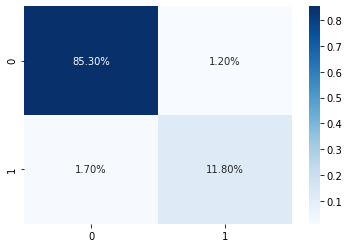

In [38]:
y_pred = LogReg_grid.predict(X_test)

print('Metrics of the logistic regression model after variable selection: \n')

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [39]:
# Making predictions on the test dataset
# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_pred = test_df2

# Using the model to make predictions on the test dataset
pred_test_LR = LogReg_grid.predict(X_pred)

# Output of the predicted results
results_LR = pd.DataFrame({'id': test_df.id,'predicted': pred_test_LR})
results_LR.head()

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [40]:
# Writing the csv file
results_LR.to_csv("results_Logit.csv",index=False)

# Model No 2: Decision Tree

In [42]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
classifier_DT = DecisionTreeClassifier(random_state=42)

score_func = make_scorer(f1_score, greater_is_better=True)

Grid_srch_parameters_list = [ [{"criterion": ["gini", "entropy"],
                                'max_depth':[None,2, 3, 4, 5, 6],
                                'max_leaf_nodes':np.arange(2, 40),                               
                               }] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_DT, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_DT = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_DT.predict_proba(X_test)[:,1] # probabilities  
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

Optimized hyper-parameters:{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 39}


Confusion matrix:
[[838  27]
 [ 32 103]]

F1 Score = 0.94100
AUC Score = 0.866
Accuracy = 0.941

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       865
           1       0.79      0.76      0.78       135

    accuracy                           0.94      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.94      0.94      0.94      1000



(838, 27, 32, 103)

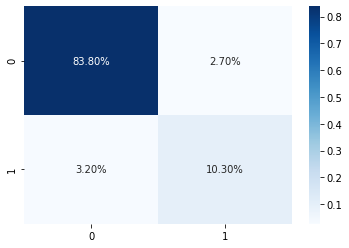

In [43]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Model No 2: Random Forest

In [44]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=42)

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(f1_score, greater_is_better=True)


Grid_srch_parameters_list = [ [{"criterion": ["gini", "entropy"],
                                'n_estimators':[100, 200, 300, 400, 500, 600],# Number of trees
                                'max_depth':[None,2, 3, 4, 5, 6],
                                'max_leaf_nodes':[None,5, 10, 50, 100],
                                #'min_samples_split': [2, 10, 50]
                               }] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities  
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

Optimized hyper-parameters:{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 200}


Confusion matrix:
[[863   2]
 [ 20 115]]

F1 Score = 0.97800
AUC Score = 0.925
Accuracy = 0.978

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       865
           1       0.98      0.85      0.91       135

    accuracy                           0.98      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



(863, 2, 20, 115)

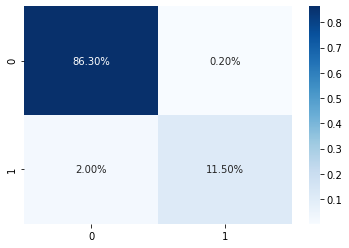

In [45]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

Text(0.5, 0, 'Decrease in Gini (recal, Gini = 2*AUC-1)')

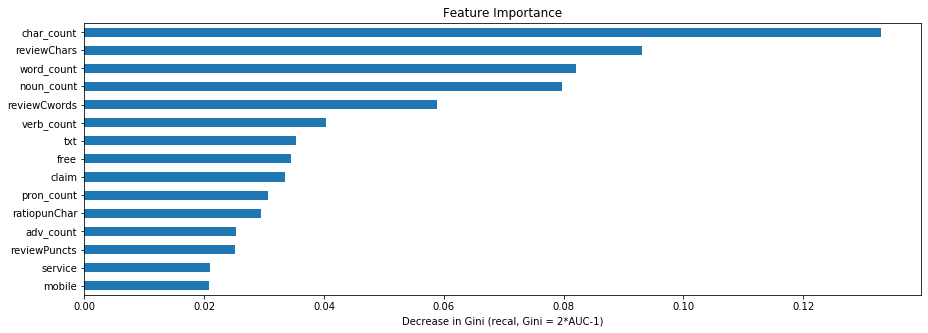

In [46]:
# Tree models do not have coefficients, but have easily-interpretable tree plots
# But in tree ensembles (such as random forect) there is no point to look at individual trees

# Useful intuition, however, can be obtained from the Feature Importance Plots

# calculate feature importances
importances = grid_search_RF.best_estimator_.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(grid_search_RF.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

In [47]:
# Using the model to make predictions on the test dataset
pred_test_RF = grid_search_RF.predict(X_pred)

# Output of the predicted results
results_RF = pd.DataFrame({'id': test_df.id,'predicted': pred_test_RF})
results_RF.head()

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [48]:
# Writing the results
results_RF.to_csv("results_RF.csv",index=False)

# Model No 3: Support Vector Machines

In [49]:
# Defining SVM hyperparameter tuning
from sklearn.svm import SVC
#Hypereparameter Grid
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

#Defininf the SVM Model 
svm_model=SVC(random_state=42)  

#Defining the SVM grid search CV model 
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,n_jobs=-1,scoring='f1')
  
# fitting the model for grid search
grid_search_SVM = svm.fit(X_train,y_train)

print('Optimized hyper-parameters:' + str(grid_search_SVM.best_params_))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.1min finished


Optimized hyper-parameters:{'C': 120, 'gamma': 0.001, 'kernel': 'rbf'}


Confusion matrix:
[[848  17]
 [ 22 113]]

F1 Score = 0.96100
AUC Score = 0.909
Accuracy = 0.961

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       865
           1       0.87      0.84      0.85       135

    accuracy                           0.96      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.96      0.96      0.96      1000



(848, 17, 22, 113)

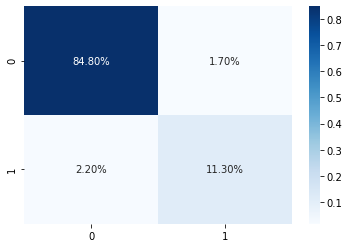

In [50]:
y_pred = grid_search_SVM.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [51]:
# Using the model to make predictions on the test dataset
pred_test_SVM = grid_search_SVM.predict(X_pred)

# Output of the predicted results
results_SVM = pd.DataFrame({'id': test_df.id,'predicted': pred_test_SVM})
results_SVM.head()

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [52]:
# Writing results
results_SVM.to_csv("results_SVM.csv",index=False)

# Model No 4: XgBoost

In [53]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=42)

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)


n_trees = [100, 200, 300, 400, 500, 600] # first, the "number of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.1] # second, speed of boosting ("learning rate")
depth = [2, 3, 4, 5, 6]
leaf_nodes = [None,5, 10, 50, 100]

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 
                                'learning_rate': learning_rates,
                                'max_depth':depth,
                                'max_leaf_nodes':leaf_nodes}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data 
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


In [54]:
print('Optimized hyper-parameters:' + str(grid_search_GBM.best_params_))

Optimized hyper-parameters:{'learning_rate': 0.1, 'max_depth': 6, 'max_leaf_nodes': 50, 'n_estimators': 400}


Confusion matrix:
[[858   7]
 [ 14 121]]

F1 Score = 0.97900
AUC Score = 0.944
Accuracy = 0.979

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       865
           1       0.95      0.90      0.92       135

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000



(858, 7, 14, 121)

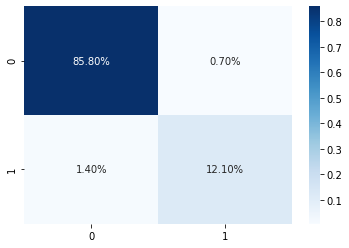

In [56]:
y_pred = grid_search_GBM.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [58]:
# Using the model to make predictions on the test dataset
pred_test_XgB = grid_search_GBM.predict(X_pred)

# Output of the predicted results
results_XgB = pd.DataFrame({'id': test_df.id,'predicted': pred_test_XgB})
results_XgB.head()

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [59]:
# Writing the results
results_XgB.to_csv("results_XgB.csv",index=False)

XgB gave the best results with a Kaggle score of 0.97316

End of Code